# 2.2 SOO for 1D scalars

In [15]:
%matplotlib inline
import sys
import os

# Sort the paths out to run from this file
parent_path = os.path.dirname(os.getcwd())
src_path = os.path.join(os.path.sep,parent_path, 'src')
sys.path.append(src_path)
print(src_path)

c:\Users\Domfx\OneDrive\Code\cyclops\src


description

In [16]:
from run_me import *


# Load any objects necessary
pickle_manager = PickleManager()
graph_manager = GraphManager()
true_temp_field = pickle_manager.read_file('simulation', 'disp_line_field.obj')
grid = pickle_manager.read_file('simulation', 'disp_line_points.obj')

field_bounds = true_temp_field.get_bounds()
sensor_bounds = field_bounds+np.array([[1], [-1]])*0.002

description

In [17]:
# Setup the sensor suite
def f(x): return 0
sensor = PointSensor(0, f, 0, np.array([[-5e10, -5e10, -5e10], [5e10, 5e10, 5e10]]), 1)
sensors = np.array([sensor]*5)
sensor_suite = SensorSuite(
    VectorField(RBFModel, field_bounds), 
    sensors
)

description

In [18]:
# Setup the experiment
optimiser = PSOOptimiser('00:00:10')
experiment = Experiment(
    true_temp_field,
    grid,
    optimiser
)
experiment.plan_soo(
    sensor_suite,
    sensor_bounds
)
res = experiment.design()
proposed_layout, true_disps, model_disps, sensor_vals = experiment.get_SOO_plotting_arrays(res.X)

n_gen  |  n_eval  |    f     |    S    |    w    |    c1    |    c2    |     f_avg     |     f_min    
     1 |       30 |        - |       - |  0.9000 |  2.00000 |  2.00000 |  5.334728E-11 |  4.273684E-12
     2 |       60 |  0.32535 |       2 |  0.6084 |  2.04699 |  1.95301 |  3.108595E-11 |  4.273684E-12
     3 |       90 |  0.05247 |       3 |  0.4331 |  2.04607 |  1.97384 |  1.784466E-11 |  2.786781E-12
     4 |      120 |  0.01663 |       3 |  0.4104 |  2.03546 |  1.98280 |  1.079930E-11 |  1.010313E-12
     5 |      150 |  0.02144 |       3 |  0.4135 |  2.02567 |  1.99951 |  5.348484E-12 |  8.532529E-13
     6 |      180 | -9.5E-03 |       3 |  0.3941 |  2.01278 |  2.01029 |  4.160493E-12 |  8.243711E-13
     7 |      210 | -1.4E-02 |       3 |  0.3914 |  2.00121 |  2.02673 |  3.706077E-12 |  7.705678E-13
     8 |      240 | -8.9E-03 |       3 |  0.3945 |  1.98763 |  2.04342 |  3.154402E-12 |  7.705678E-13
     9 |      270 | -8.8E-03 |       3 |  0.3946 |  1.97274 |  2.05028 | 

description

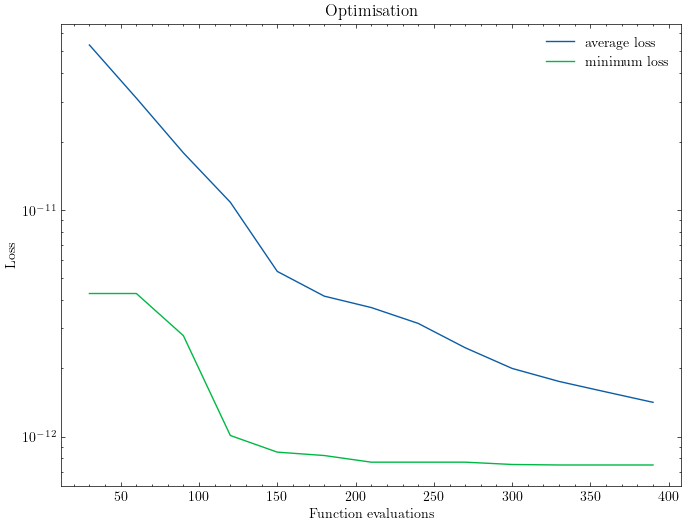

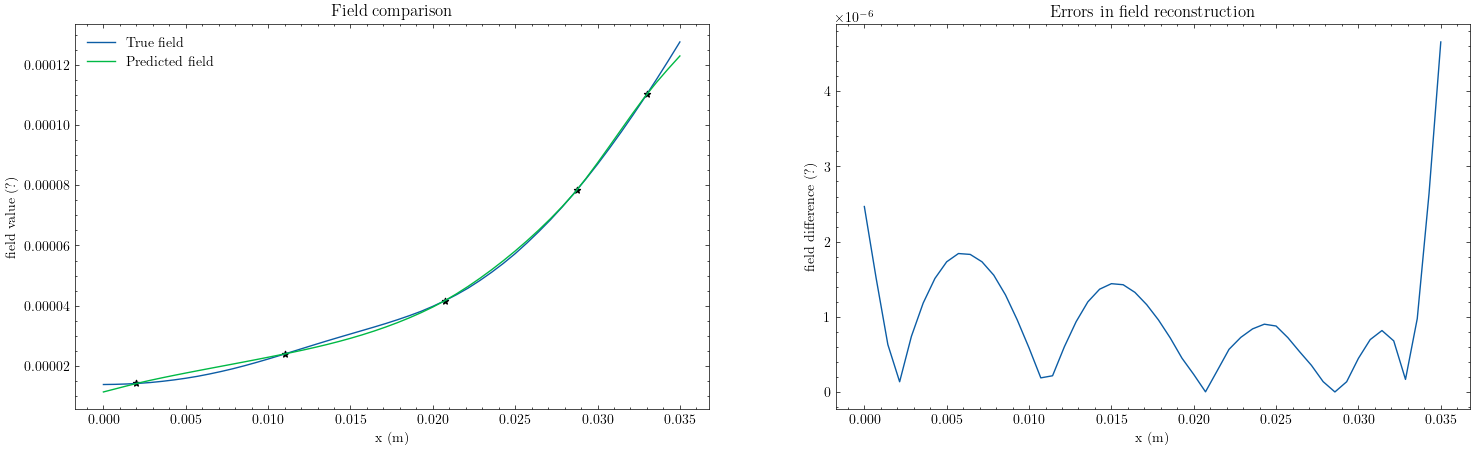

In [19]:
mag_true_disps = np.linalg.norm(true_disps, axis=1).reshape(-1, 1)
mag_model_disps = np.linalg.norm(model_disps, axis=1).reshape(-1, 1)
mag_sensor_vals = np.linalg.norm(sensor_vals, axis=1).reshape(-1, 1)

# Display the results
graph_manager.build_optimisation(
    res.history
)
graph_manager.draw()
graph_manager.build_1D_compare(
    grid,
    proposed_layout,
    mag_sensor_vals,
    mag_true_disps,
    mag_model_disps
)